# Reinforcement Learning – Exercise 1
### Building the Simulation Environment
This notebook implements the required components of the 100-state gridworld environment:
- 1.a: Create the 100-state environment
- 1.b: Define the possible actions
- 1.c: Implement the state transition function
- 1.d: Implement the reward function
- 1.e: Implement a function to perform a single action
- 1.f: Simulate and plot 30 episodes


In [160]:
# ==== ALL IMPORTS IN FIRST CELL ====
import random
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

## 1.a — Create the State Environment

The environment is a 10×10 grid with 100 states, indexed from 0 to 99:

- State 0 → top-left
- State 99 → bottom-right
- State 9 → top-right
- State 90 → bottom-left

We represent each state as an integer, and convert between:
- **state index** (0–99)
- **grid coordinates (row, col)**

In [161]:
# Environment parameters
GRID_SIZE = 10
N_STATES = GRID_SIZE * GRID_SIZE

def state_to_pos(s):
    """Convert state index (0–99) to grid coordinates (row, col)."""
    return divmod(s, GRID_SIZE)

def pos_to_state(r, c):
    """Convert grid coordinates (row, col) to state index."""
    return r * GRID_SIZE + c

# Quick test
print("State 0:", state_to_pos(0))
print("State 99:", state_to_pos(99))
print("Row 3, Col 7 →", pos_to_state(3, 7))

State 0: (0, 0)
State 99: (9, 9)
Row 3, Col 7 → 37


## 1.b — Define the Possible Actions

Each state has up to 4 possible actions:

- `'N'`: move north (row – 1)
- `'S'`: move south (row + 1)
- `'E'`: move east  (col + 1)
- `'W'`: move west  (col – 1)

If an action would move off the grid (e.g., going North from row 0), the agent stays in the same state.

In [162]:
# Action set
ACTIONS = ["N", "S", "E", "W"]

## 1.c — Implement the State Transition Function

The function must:

1. Receive current state `s` and action `a`
2. Convert `s` into grid coordinates
3. Apply the movement (if valid)
4. Return the next state

Invalid moves → remain in same state.

In [163]:
def transition(s, a):
    """Return next state given action, with border checks."""
    r, c = state_to_pos(s)

    if a == "N" and r > 0:
        r -= 1
    elif a == "S" and r < GRID_SIZE - 1:
        r += 1
    elif a == "E" and c < GRID_SIZE - 1:
        c += 1
    elif a == "W" and c > 0:
        c -= 1

    return pos_to_state(r, c)

# Tests
print(transition(0, "N"))  # stays 0
print(transition(0, "E"))  # moves to 1
print(transition(9, "S"))  # stays 9
print(transition(55, "N")) # moves to 45


0
1
19
45


## 1.d — Reward Function

The environment rewards:

- **+1** if the agent reaches goal state (state 99)
- **-1** if the agent hits a terminal hole (state 90)
- **0** otherwise

We assume:
- State 99 = GOAL
- State 90 = BAD STATE


In [164]:
GOAL = 99
BAD = 90

def reward(s):
    """Return reward for entering state s."""
    if s == GOAL:
        return 1
    elif s == BAD:
        return -1
    else:
        return 0

## 1.e — Function to Perform a Single Action

This function:
- takes current state `s`
- picks an action (random for now)
- computes next state using `transition()`
- computes reward using `reward()`
- returns `(next_state, reward)`

In [165]:
def step(s):
    """Take a random action from this state."""
    a = random.choice(ACTIONS)
    next_s = transition(s, a)
    r = reward(next_s)
    return next_s, r

# Episode Path Visualization

We simulate **1 episode**, track all visited states, and visualize the path on a 10×10 grid.

- Each state the agent visits is marked.
- The **start** and **end** are highlighted differently.
- This helps understand the agent's movement during random policy execution.


In [166]:
def run_episode_path(max_steps=50):
    s = 0
    path = [s]

    for _ in range(max_steps):
        s, r = step(s)
        path.append(s)
        if s in [GOAL, BAD]:
            break
    return path

path = run_episode_path()
path[:20], len(path)


([0, 0, 10, 10, 11, 1, 2, 3, 4, 14, 13, 3, 3, 13, 23, 13, 12, 22, 23, 24], 51)

## 1.f — Simulate Episodes and Collect Statistics

We simulate:

- 30 episodes
- Each episode starts at state 0
- Ends when:
  - state == GOAL, or
  - state == BAD, or
  - max 50 steps reached

For each episode record:
- total reward
- total number of steps

We finish by plotting:
- A boxplot of total rewards
- A boxplot of total steps


In [167]:
rewards = []
steps_list = []
exec_times = []
visit_counts = np.zeros((GRID_SIZE, GRID_SIZE))  # reset counts

def run_episode(max_steps=50):
    s = 0
    total_reward = 0
    start_time = time.time()
    for step_i in range(max_steps):
        s, rwd = step(s)
        total_reward += rwd

        r, c = state_to_pos(s)
        visit_counts[r, c] += 1

        if s in [GOAL, BAD]:
            end_time = time.time()
            return total_reward, step_i + 1, end_time - start_time
    end_time = time.time()
    return total_reward, max_steps, end_time - start_time  # ended by timeout

# Run 30 episodes
NUM_OF_EPISODES = 30

for _ in range(NUM_OF_EPISODES):
    r, st, t  = run_episode()
    rewards.append(r)
    steps_list.append(st)
    exec_times.append(t)

rewards = np.array(rewards)
steps_list = np.array(steps_list)
exec_times = np.array(exec_times)


## Boxplots of Total Rewards and Total Steps
These boxplots summarize how the agent performed across 30 random-policy episodes.
Box Plot

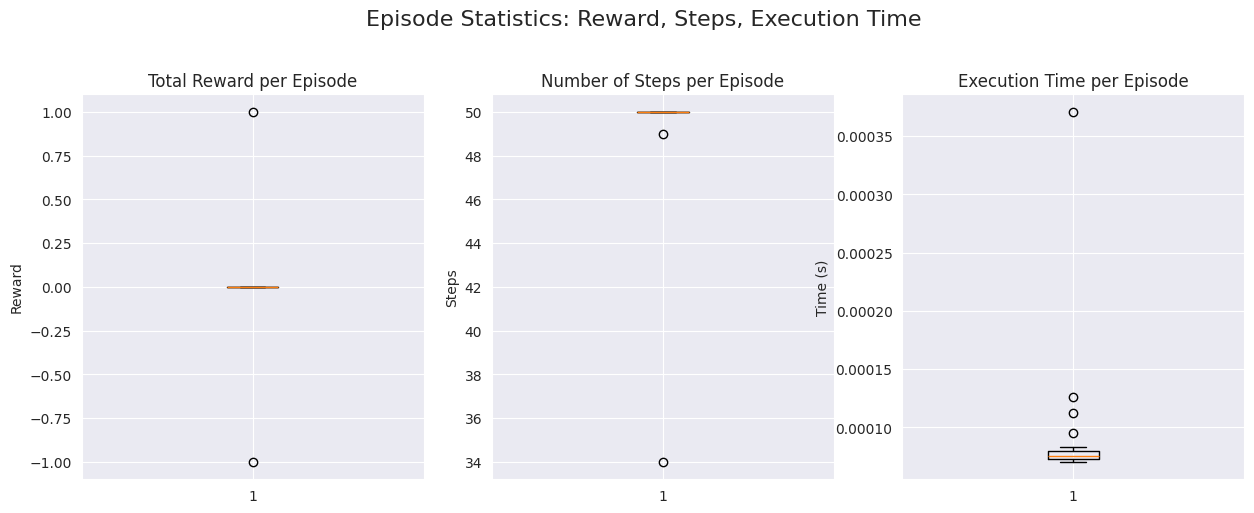

Mean Reward: 0.0
Mean Steps: 49.43333333333333
Mean Execution Time (s): 8.88824462890625e-05


In [168]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(rewards)
plt.title("Total Reward per Episode")
plt.ylabel("Reward")

plt.subplot(1,3,2)
plt.boxplot(steps_list)
plt.title("Number of Steps per Episode")
plt.ylabel("Steps")

plt.subplot(1,3,3)
plt.boxplot(exec_times)
plt.title("Execution Time per Episode")
plt.ylabel("Time (s)")

plt.suptitle("Episode Statistics: Reward, Steps, Execution Time", fontsize=16, y=1.05)
plt.show()

print("Mean Reward:", rewards.mean())
print("Mean Steps:", steps_list.mean())
print("Mean Execution Time (s):", exec_times.mean())


## Heatmap of State Visit Frequency

After running multiple episodes, we can visualize how often each grid state was visited.
This helps us understand the behavior of the agent under a random policy.

- Darker color → fewer visits
- Brighter color → more visits


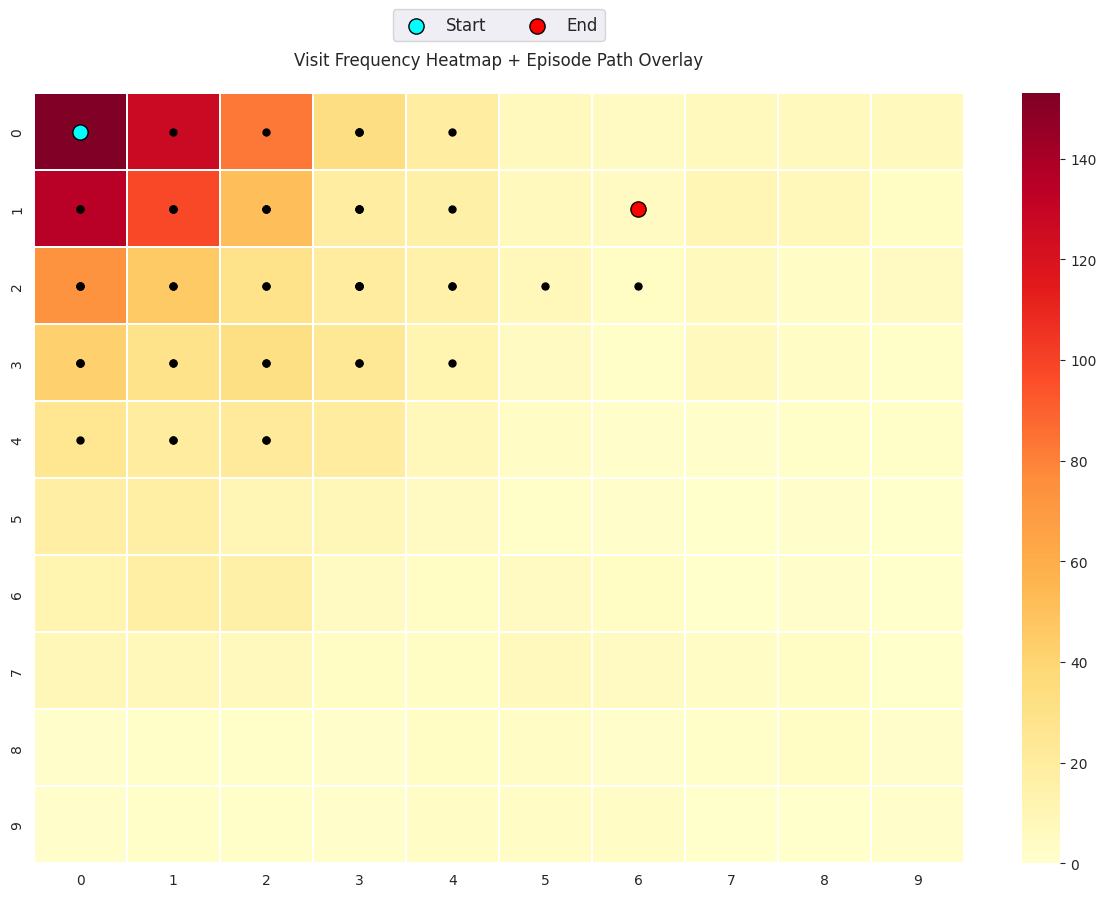

In [169]:
plt.figure(figsize=(15, 10))

# Background heatmap
sns.heatmap(visit_counts, cmap="YlOrRd", linewidths=0.3)

# Overlay episode path
for s in path:
    r, c = state_to_pos(s)
    plt.scatter(c + 0.5, r + 0.5, color="black", s=25)

# Mark START
sr, sc = state_to_pos(path[0])
plt.scatter(sc + 0.5, sr + 0.5, color="cyan", s=120, edgecolors="black", label="Start")

# Mark END (Goal or Bad)
er, ec = state_to_pos(path[-1])
plt.scatter(ec + 0.5, er + 0.5, color="red", s=120, edgecolors="black", label="End")

# Title
plt.title("Visit Frequency Heatmap + Episode Path Overlay", pad=20)

# Legend outside plot, below title
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.12),  # move legend above the plot
    ncol=2,
    frameon=True,
    fontsize=12
)

plt.show()

# EXERCISE 2: Q-LEARNING IMPLEMENTATION
#### Purpose: Implement Q-Learning to allow the agent to learn optimal actions through experience, rather than acting randomly forever.
#### Q-Learning Formula:
#### Q[s,a] = (1-α)·Q[s,a] + α·(r + γ·max(Q[s',a']))

#### Where:
    - Q[s,a]: Expected future reward for taking action 'a' in state 's'
    - α (alpha): Learning rate (how much new info overrides old)
    - γ (gamma): Discount factor (how much future rewards matter)
    - r: Immediate reward from reaching new state
    - max(Q[s',a']): Best possible future reward from next state

Q-Learning Parameters and Initialization

In [170]:
# Learning rate: how quickly new experiences update Q-values
# High α (close to 1) = learn quickly, forget old info
# Low α (close to 0) = learn slowly, retain old info
alpha = 0.7

# Discount factor: how much we value future rewards
# High γ (close to 1) = prioritize long-term rewards
# Low γ (close to 0) = prioritize immediate rewards
gamma = 0.99

# Q[s, a] represents the expected total reward for taking action 'a' in state 's'
Q = np.zeros((N_STATES, len(ACTIONS)))  # Q[s, a]

# Total learning steps for each experiment
NUM_STEPS = 20000

test_steps = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
NUM_TEST_EPISODES = 30


Helper Functions

In [171]:
def choose_best_action(s):
    """Return the best action index; break ties randomly."""
    q_values = Q[s]
    max_q = np.max(q_values)
    best_actions = [i for i, q in enumerate(q_values) if q == max_q]
    return random.choice(best_actions)

def step_q(s):
    """Perform a random action (for random walk)"""
    a = random.choice(range(len(ACTIONS)))
    next_s = transition(s, ACTIONS[a])
    r = reward(next_s)
    # Q-update
    Q[s, a] = (1 - alpha) * Q[s, a] + alpha * (r + gamma * np.max(Q[next_s]))
    return next_s, r


Test Episode Using Current Q Table

In [172]:
def test_episode(max_steps=1000):
    s = 0
    total_reward = 0
    for _ in range(max_steps):
        a = choose_best_action(s)
        s = transition(s, ACTIONS[a])
        total_reward += reward(s)
        if s in [GOAL, BAD]:
            break
    return total_reward / max_steps


Main Q-Learning Simulation with Random Walk

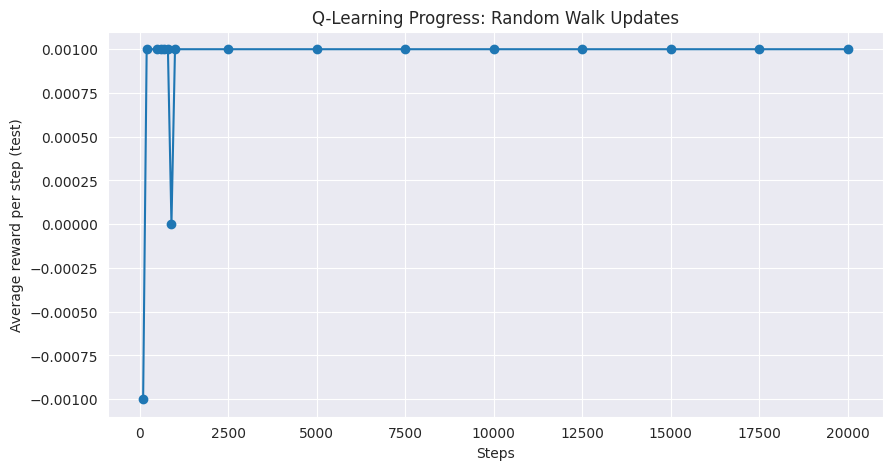

Mean exec time: 0.029812395572662354
Std exec time: 0.028465092824803487


In [173]:
avg_rewards_over_steps = []
exec_times = []

for test_point in test_steps:
    Q.fill(0)  # reset Q table for each experiment
    s = 0
    rewards_log = []
    start_time = time.time()
    for step_i in range(test_point):
        s, _ = step_q(s)
    # Run 1000-step test
    avg_reward = test_episode()
    rewards_log.append(avg_reward)
    exec_times.append(time.time() - start_time)
    avg_rewards_over_steps.append(avg_reward)

plt.figure(figsize=(10,5))
plt.plot(test_steps, avg_rewards_over_steps, marker='o')
plt.xlabel("Steps")
plt.ylabel("Average reward per step (test)")
plt.title("Q-Learning Progress: Random Walk Updates")
plt.grid(True)
plt.show()

print("Mean exec time:", np.mean(exec_times))
print("Std exec time:", np.std(exec_times))


Q-Learning Using Best Action Selection (Greedy Updates)

In [174]:
Q.fill(0)
s = 0
for step_i in range(NUM_STEPS):
    a = choose_best_action(s)  # pick best action instead of random
    next_s = transition(s, ACTIONS[a])
    r = reward(next_s)
    Q[s, a] = (1 - alpha) * Q[s, a] + alpha * (r + gamma * np.max(Q[next_s]))
    s = next_s
    if s in [GOAL, BAD]:
        s = 0  # restart


#### Heatmap of Learned Q Values

Purpose: Show which states the agent learned are valuable.

The heatmap displays max(Q[s,a]) for each state:
- Bright colors = High value states (close to goal)
- Dark colors = Low value states (far from goal or dead ends)

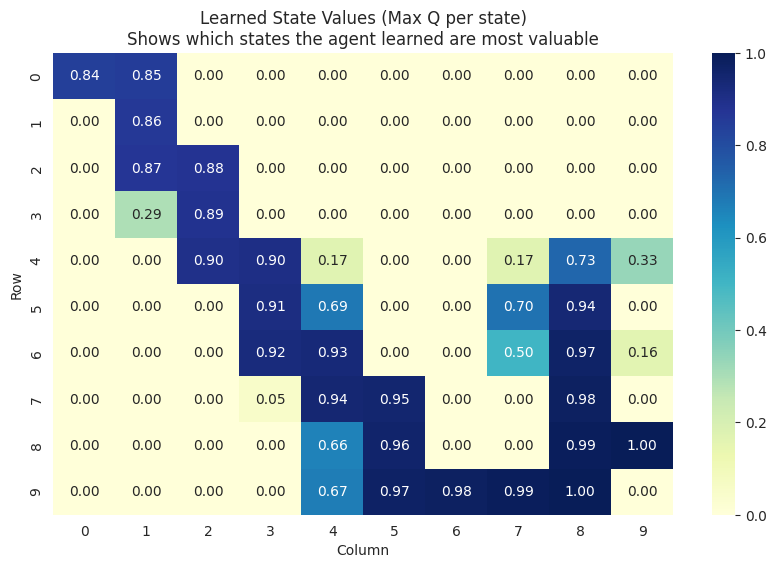

In [175]:
max_q_per_state = np.max(Q, axis=1).reshape(GRID_SIZE, GRID_SIZE)

plt.figure(figsize=(10,6))
sns.heatmap(max_q_per_state, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Learned State Values (Max Q per state)\n" +
          "Shows which states the agent learned are most valuable")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

# EXERCISE 3
Purpose: Implement a balanced strategy that combines exploration and exploitation

#### Requirements:
    1. Try THREE different fixed greed parameters
    2. Try INCREASING greed (30% for first 30% of episodes, up to 100% by end)
    3. Compare results WITH and WITHOUT greed (vs Exercise 2a and 2b)
    4. Compare Q-tables from all strategies

#### ε-Greedy Action Selection
Where:
- epsilon = 1 - greed
- greed = probability of exploitation
- epsilon = probability of random exploration

In [176]:
def epsilon_greedy_action(s, epsilon):
    """Choose best action with prob (1 - epsilon), else random."""
    if random.random() < epsilon:
        return random.choice(range(len(ACTIONS)))   # explore
    else:
        q_values = Q[s]
        max_q = np.max(q_values)
        best_actions = [i for i,q in enumerate(q_values) if q == max_q]
        return random.choice(best_actions)

Q-Learning Step Using ε-Greedy

In [177]:
def step_q_epsilon(s, epsilon):
    a = epsilon_greedy_action(s, epsilon)
    next_s = transition(s, ACTIONS[a])
    r = reward(next_s)

    Q[s, a] = (1 - alpha) * Q[s, a] + alpha * (r + gamma * np.max(Q[next_s]))

    return next_s

Test Episode (Greedy Only)

In [178]:
def test_episode(max_steps=1000):
    s = 0
    total = 0
    for _ in range(max_steps):
        a = choose_best_action(s)
        s = transition(s, ACTIONS[a])
        total += reward(s)
        if s in [GOAL, BAD]:
            break
    return total / max_steps


Training Function for a Given Greed Value

In [179]:
def train_with_greed(greed, total_steps=20000, test_steps_list=None):
    if test_steps_list is None:
        test_steps_list = [100,200,500,1000,2500,5000,7500,10000,15000,20000]

    epsilon = 1 - greed
    Q.fill(0)
    s = 0
    avg_rewards = []

    for step in range(1, total_steps+1):
        s = step_q_epsilon(s, epsilon)
        if s in [GOAL, BAD]:
            s = 0

        if step in test_steps_list:
            avg_rewards.append(test_episode())

    return avg_rewards, Q.copy()


Run 3 Different Greed Parameters

In [180]:
greed_values = [0.9, 0.5, 0.2]  # exploit-heavy → explore-heavy
results = {}

for g in greed_values:
    print(f"Training with greed={g}")
    avg_rewards, q_table_copy = train_with_greed(g)
    results[g] = (avg_rewards, q_table_copy)


Training with greed=0.9
Training with greed=0.5
Training with greed=0.2


Plot Comparison

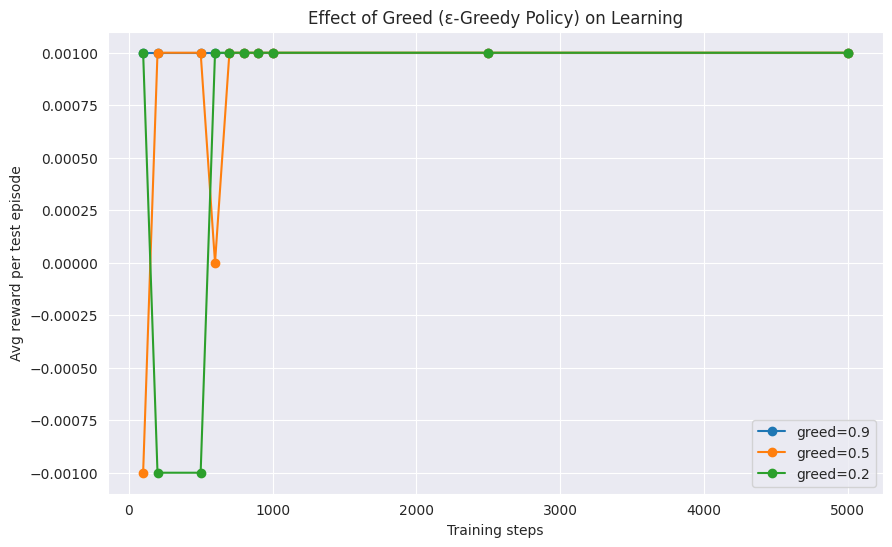

In [181]:
plt.figure(figsize=(10,6))

for g in greed_values:
    y = results[g][0]
    x = test_steps[:len(y)]     # match lengths automatically

    plt.plot(x, y, marker='o', label=f"greed={g}")

plt.xlabel("Training steps")
plt.ylabel("Avg reward per test episode")
plt.title("Effect of Greed (ε-Greedy Policy) on Learning")
plt.legend()
plt.grid(True)
plt.show()


##### Increasing Greed Schedule (0.3 → 1.0)
##### ε decreases from 0.7 → 0.0

In [182]:
def train_with_increasing_greed(total_steps=20000):
    Q.fill(0)
    s = 0
    avg_rewards = []

    for step in range(1, total_steps+1):
        progress = step / total_steps
        greed = 0.3 + 0.7 * progress       # 0.3 → 1.0
        epsilon = 1 - greed

        s = step_q_epsilon(s, epsilon)
        if s in [GOAL, BAD]:
            s = 0

        if step in test_steps:
            avg_rewards.append(test_episode())

    return avg_rewards, Q.copy()

inc_rewards, inc_Q = train_with_increasing_greed()


Plot Comparison vs Fixed Greed

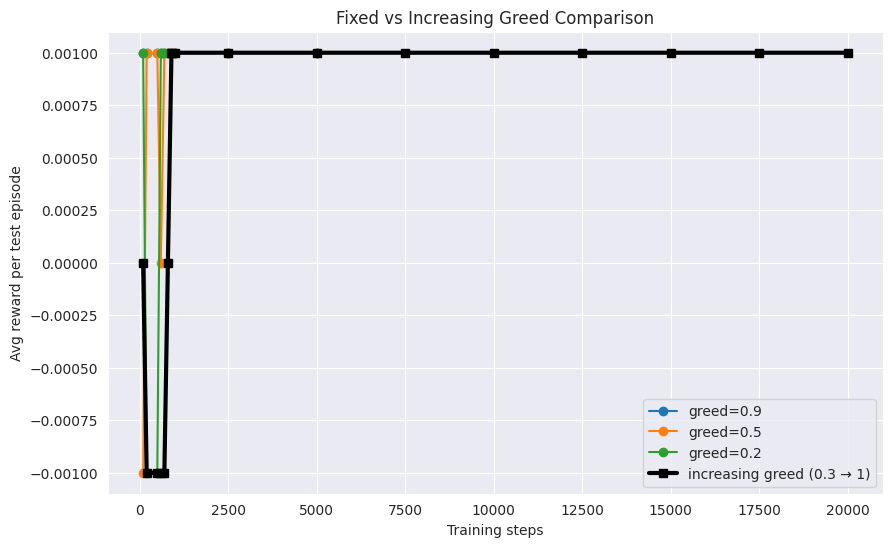

In [183]:
plt.figure(figsize=(10,6))

for g in greed_values:
    y = results[g][0]                # rewards list
    x = test_steps[:len(y)]          # match lengths automatically
    plt.plot(x, y, marker='o', label=f"greed={g}")

# increasing greed
y_inc = inc_rewards
x_inc = test_steps[:len(y_inc)]
plt.plot(x_inc, y_inc, marker='s', linewidth=3, label="increasing greed (0.3 → 1)", color='black')

plt.xlabel("Training steps")
plt.ylabel("Avg reward per test episode")
plt.title("Fixed vs Increasing Greed Comparison")
plt.legend()
plt.grid(True)
plt.show()


Visualize Final Q-Table Heatmap

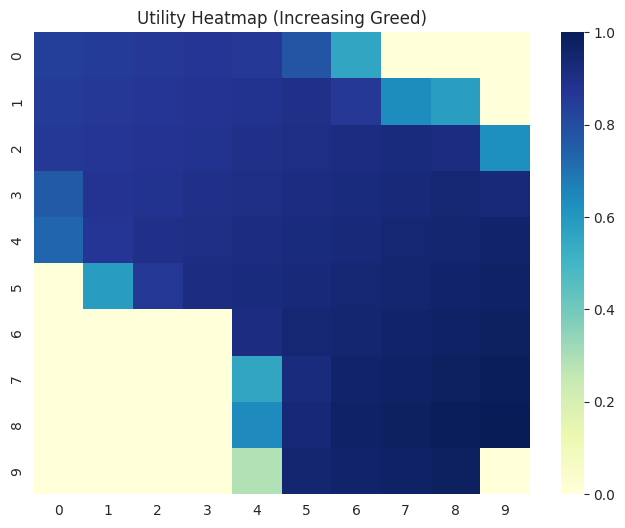

In [184]:
final_util = np.max(inc_Q, axis=1).reshape(GRID_SIZE, GRID_SIZE)

plt.figure(figsize=(8,6))
sns.heatmap(final_util, cmap="YlGnBu")
plt.title("Utility Heatmap (Increasing Greed)")
plt.show()